In [7]:
import matplotlib.pyplot as plt
import pandas as pd
path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'

In [55]:
df = pd.read_csv(path + '/30528.csv')
print(df)

                       x  major  minor  rssi  txpower  est_dist  \
0      c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
1      c2:02:0b:00:05:44  40001  30528   -62      -59      1.59   
2      c2:02:0b:00:05:44  40001  30528   -65      -59      1.94   
3      c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
4      c2:02:0b:00:05:44  40001  30528   -66      -59      2.08   
...                  ...    ...    ...   ...      ...       ...   
67646  c2:02:0b:00:05:44  40001  30528   -64      -59      1.82   
67647  c2:02:0b:00:05:44  40001  30528   -57      -59      0.71   
67648  c2:02:0b:00:05:44  40001  30528   -58      -59      0.84   
67649  c2:02:0b:00:05:44  40001  30528   -58      -59      0.84   
67650  c2:02:0b:00:05:44  40001  30528   -65      -59      1.94   

                   time  real_dist  
0      2021.11.16 14:20          1  
1      2021.11.16 14:20          1  
2      2021.11.16 14:20          1  
3      2021.11.16 14:20          1  
4      202

In [56]:
rssi_data = df[['rssi','est_dist']]
rssi_data.to_csv('rssi_data.csv', index=False)

In [24]:
#df1 = pd.read_csv(path + '/rssi_data.csv')
#print(df1)

       rssi
0       -64
1       -62
2       -65
3       -64
4       -66
...     ...
67646   -64
67647   -57
67648   -58
67649   -58
67650   -65

[67651 rows x 1 columns]


In [62]:
rssi_data_plt = pd.read_csv(path + '/rssi_data.csv')
print(rssi_data_plt)
rssi = rssi_data_plt['rssi']
est_dist  = rssi_data_plt['est_dist']

       rssi  est_dist
0       -64      1.82
1       -62      1.59
2       -65      1.94
3       -64      1.82
4       -66      2.08
...     ...       ...
67646   -64      1.82
67647   -57      0.71
67648   -58      0.84
67649   -58      0.84
67650   -65      1.94

[67651 rows x 2 columns]


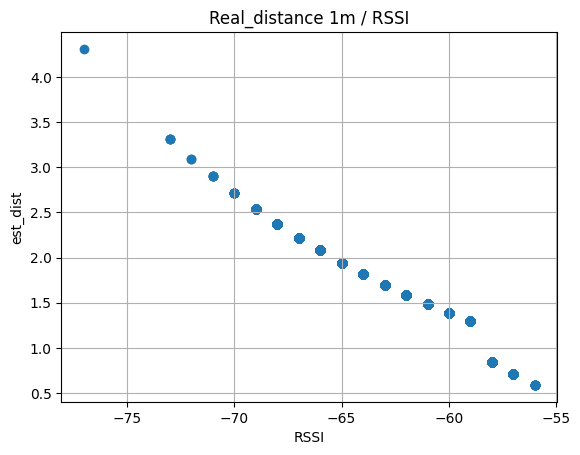

In [69]:
plt.title('Real_distance 1m / RSSI')
plt.scatter(rssi,est_dist)
plt.ylabel('est_dist')
plt.xlabel('RSSI')
plt.grid('true')


Original RSSI Values: [-64, -62, -65, -64, -66, -64, -60, -65, -65, -63, -63, -62, -64, -62, -62, -65, -66, -64, -62, -62, -61, -64, -63, -60, -61, -67, -65, -61, -61, -63, -63, -61, -66, -64, -67, -60, -61, -67, -63, -63, -67, -65, -64, -61, -66, -64, -61, -62, -63, -63, -63, -66, -67, -61, -62, -67, -65, -65, -61, -66, -66, -63, -61, -65, -67, -63, -68, -65, -61, -61, -66, -66, -62, -67, -63, -66, -65, -64, -62, -66, -66, -63, -61, -66, -64, -66, -62, -62, -61, -66, -66, -63, -63, -65, -63, -63, -66, -63, -61, -61, -67, -61, -62, -63, -62, -62, -67, -63, -64, -63, -61, -64, -63, -60, -62, -66, -68, -65, -61, -61, -64, -63, -62, -62, -62, -66, -63, -65, -65, -66, -66, -66, -64, -67, -70, -63, -61, -66, -64, -60, -66, -66, -65, -63, -63, -61, -64, -60, -64, -64, -63, -64, -61, -63, -61, -65, -61, -66, -63, -61, -67, -64, -63, -62, -64, -61, -65, -66, -63, -64, -64, -66, -67, -65, -61, -65, -65, -64, -61, -63, -62, -65, -62, -67, -63, -65, -61, -66, -65, -64, -60, -66, -65, -65, -65, -6

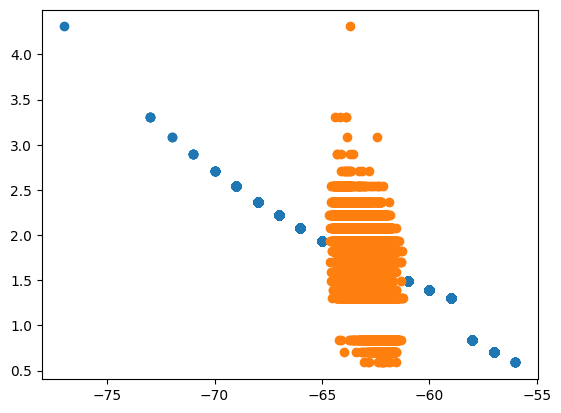

In [73]:
import pandas as pd

class KalmanFilter():
    def __init__(self, processNoise=0.005, measurementNoise=20):
        self.isInitialized = False
        self.processNoise = processNoise
        self.measurementNoise = measurementNoise
        self.predictedRSSI = 0
        self.errorCovariance = 0

    def filtering(self, rssi):
        if not self.isInitialized:
            self.isInitialized = True
            priorRSSI = rssi
            priorErrorCovariance = 1
        else:
            priorRSSI = self.predictedRSSI
            priorErrorCovariance = self.errorCovariance + self.processNoise

        kalmanGain = priorErrorCovariance / (priorErrorCovariance + self.measurementNoise)
        self.predictedRSSI = priorRSSI + (kalmanGain * (rssi - priorRSSI))
        self.errorCovariance = (1 - kalmanGain) * priorErrorCovariance

        return self.predictedRSSI

def apply_kalman_filter(file_path):
    # Read CSV file into a DataFrame
    df =  pd.read_csv(path + '/rssi_data.csv')

    # Extract the 'rssi' column from the DataFrame
    rssi_data = df['rssi'].tolist()

    # Kalman filter initialization
    kalman = KalmanFilter()

    # Apply Kalman filter to the RSSI data
    filtered_rssi = [kalman.filtering(rssi) for rssi in rssi_data]

    # Output results
    print("Original RSSI Values:", rssi_data)
    plt.scatter(rssi_data, est_dist)
    print("Filtered RSSI Values:", filtered_rssi)
    plt.scatter(filtered_rssi, est_dist)

# Specify the correct file path
file_path = '/Users/hwayeong/Desktop/RSSI_Speed_Estimation/RSSI_Speed_Estimation/data/'
apply_kalman_filter(file_path)



